In [1]:
from google.colab import files
uploaded = files.upload()

Saving SAB.csv to SAB.csv


In [2]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [3]:
df = pd.read_csv('SAB.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df1=df.reset_index()['Price']

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1># 4. Split the data into training, testing arcording to 7:3

In [5]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [9]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 21ms/step - loss: 0.0069
Epoch 2/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 3/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0012
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 9.8088e-04
Epoch 5/100
13/13 [==============================] - 0s 20ms/step - loss: 8.2257e-04
Epoch 6/100
13/13 [==============================] - 0s 19ms/step - loss: 7.3709e-04
Epoch 7/100
13/13 [==============================] - 0s 25ms/step - loss: 6.7490e-04
Epoch 8/100
13/13 [==============================] - 0s 21ms/step - loss: 6.3044e-04
Epoch 9/100
13/13 [==============================] - 0s 19ms/step - loss: 6.0011e-04
Epoch 10/100
13/13 [==============================] - 0s 19ms/step - loss: 5.8102e-04
Epoch 11/100
13/13 [==============================] - 0s 35ms/step - loss: 5.4641e-04
Epoch 12/100
13/13 [==============================] - 0s 34ms/step - loss: 

In [11]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 7ms/step


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [13]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)


Testing RMSE: 1088.7901847986323
Test MAE:  787.3717447916666
Test MAPE:  1.1815832705092857


In [14]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.03627668]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

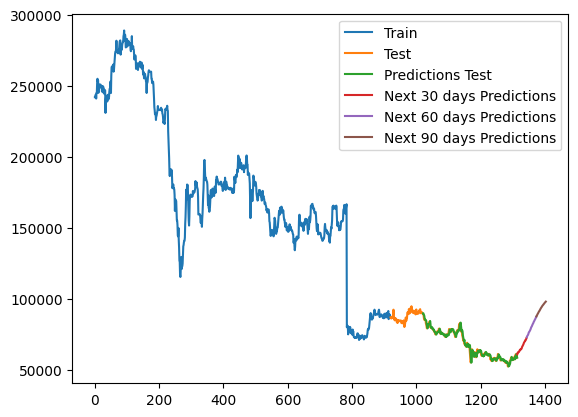

In [15]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 8:2

In [16]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [17]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.0421
Epoch 2/100
15/15 [==============================] - 0s 21ms/step - loss: 0.0050
Epoch 3/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0024
Epoch 4/100
15/15 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 5/100
15/15 [==============================] - 0s 21ms/step - loss: 0.0018
Epoch 6/100
15/15 [==============================] - 0s 27ms/step - loss: 0.0016
Epoch 7/100
15/15 [==============================] - 0s 32ms/step - loss: 0.0017
Epoch 8/100
15/15 [==============================] - 1s 34ms/step - loss: 0.0014
Epoch 9/100
15/15 [==============================] - 0s 33ms/step - loss: 0.0013
Epoch 10/100
15/15 [==============================] - 1s 36ms/step - loss: 0.0012
Epoch 11/100
15/15 [==============================] - 1s 35ms/step - loss: 0.0013
Epoch 12/100
15/15 [==============================] - 1s 34ms/step - loss: 0.0011
Epoch 13/100
15/15 [=====

In [22]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 7ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [24]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 1696.6836732535692
Test MAE:  1385.4823013117282
Test MAPE:  2.3178534067192835


In [25]:
# 13. Dự báo 90 ngày tiếp theo

x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]

n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.03817437]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

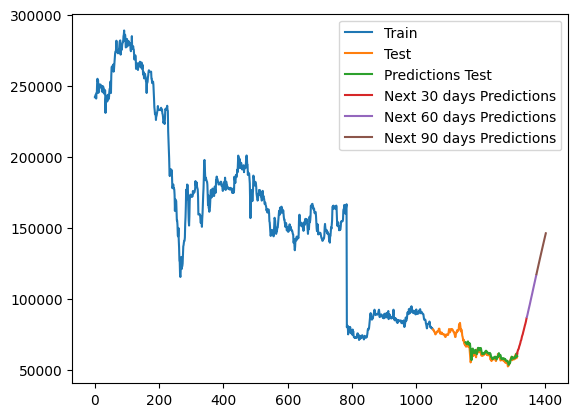

In [26]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 9:1

In [27]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [28]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [31]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 18ms/step - loss: 0.0112
Epoch 2/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0021
Epoch 3/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0013
Epoch 4/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0010
Epoch 5/100
17/17 [==============================] - 0s 19ms/step - loss: 9.0340e-04
Epoch 6/100
17/17 [==============================] - 0s 19ms/step - loss: 9.2551e-04
Epoch 7/100
17/17 [==============================] - 0s 20ms/step - loss: 7.7382e-04
Epoch 8/100
17/17 [==============================] - 0s 19ms/step - loss: 7.0510e-04
Epoch 9/100
17/17 [==============================] - 0s 20ms/step - loss: 6.8494e-04
Epoch 10/100
17/17 [==============================] - 0s 21ms/step - loss: 6.2134e-04
Epoch 11/100
17/17 [==============================] - 0s 19ms/step - loss: 6.0536e-04
Epoch 12/100
17/17 [==============================] - 0s 20ms/step - loss: 6.12

In [33]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [34]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [35]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 1132.6565395088794
Test MAE:  872.8186743951605
Test MAPE:  1.5263249733841568


In [36]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



[0.03825933]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

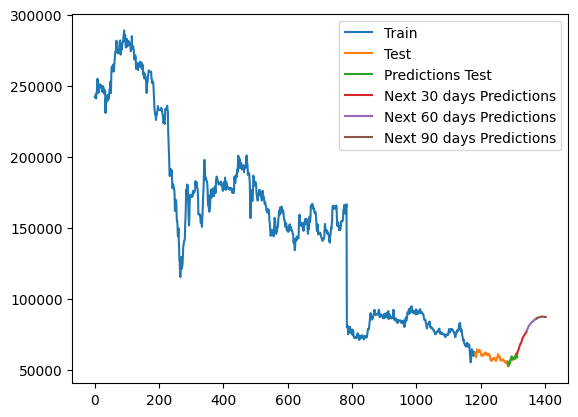

In [37]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()